<a href="https://colab.research.google.com/github/BigOhNo/SCI1402_PointFusion/blob/main/SCI1402_Pointfusion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Importer kaggle API et jeu de données.

*   `kaggle.json` → API pour télécharger jeu de données de Melting Point qui se trouve à https://www.kaggle.com/competitions/melting-point/data

*   **`train.csv` → Jeu de données principale pour faire l'entraînement. (targetTM + Features)**
*   `test.csv` → jeu de données pour faire le test. (Features seulement)




In [1]:
# Télécharger kaggle.json
!gdown --id 1m3ebmCd6ffn7wDsEKi3aYLf4aCShGBZi

/usr/local/lib/python3.12/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1m3ebmCd6ffn7wDsEKi3aYLf4aCShGBZi
To: /content/kaggle.json
100% 63.0/63.0 [00:00<00:00, 222kB/s]


In [2]:
import os

# Créer répertoire .kaggle si n'existe pas
!mkdir -p ~/.kaggle

# Déplacer kaggle.json dans le répertoire
if os.path.exists('/content/kaggle.json'):
    !mv /content/kaggle.json ~/.kaggle/
    print("kaggle.json moved to ~/.kaggle/")
else:
    print("kaggle.json not found in /content/. Please ensure it's uploaded.")

# Définir permissions pour fichier kaggle.json
!chmod 600 ~/.kaggle/kaggle.json
print("Permissions for kaggle.json set.")

# Télécharger train.csv et test.csv de Melting Point
!kaggle competitions download -c melting-point -f train.csv
!kaggle competitions download -c melting-point -f test.csv

kaggle.json moved to ~/.kaggle/
Permissions for kaggle.json set.
  0% 0.00/2.23M [00:00<?, ?B/s]
100% 2.23M/2.23M [00:00<00:00, 484MB/s]
  0% 0.00/570k [00:00<?, ?B/s]
100% 570k/570k [00:00<00:00, 133MB/s]


# 2. Charger jeu de données.

In [3]:
import pandas as pd

# Charger jeu de données dans un DataFrame
df_train = pd.read_csv('/content/train.csv', sep=',')
display(df_train.head())
print(df_train.shape)
print(df_train.dtypes)

,id,SMILES,Tm,Group 1,Group 2,Group 3,Group 4,Group 5,Group 6,Group 7,...,Group 415,Group 416,Group 417,Group 418,Group 419,Group 420,Group 421,Group 422,Group 423,Group 424
0,2175,FC1=C(F)C(F)(F)C1(F)F,213.15,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1222,c1ccc2c(c1)ccc3Nc4ccccc4c23,407.15,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2994,CCN1C(C)=Nc2ccccc12,324.15,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1704,CC#CC(=O)O,351.15,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2526,CCCCC(S)C,126.15,2,3,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


(2662, 427)
id             int64
SMILES        object
Tm           float64
Group 1        int64
Group 2        int64
              ...   
Group 420      int64
Group 421      int64
Group 422      int64
Group 423      int64
Group 424      int64
Length: 427, dtype: object


**Explication**

Notre jeu de données contient **2662 rangées** de molécules et **427 colonnes** d'attributs.

Les colonnes :

*   **id** → L'identifiant unique de la molécule. (int)

*   **SMILES** → La représentation textuelle linéaire de la structure chimique de la molécule. (object/string)

*   **Tm** → La température de fusion (*temperature of melting*) représente la variable cible (*target*) que nous devons prédire dans le test.csv. (float)

*   **Group 1...Group 424** → Représentent les descripteurs qui correspondent à un type de fragment structural spécifique. La valeur dans la cellule est le nombre d'occurrences de ce groupe particulier dans la structure de la molécule. (int)

---

# 3. Préparation des données.

## 3.1 Normaliser les colonnes Group 1...Group 424.

Le nom de ces colonnes contient un espace, cela va compliquer le codage. On va enlever l'espace. (Group 1 → Group1)

In [4]:
# Normalisation des colonnes Group X (Group 1 -> Group1)
group_cols = {col: col.replace(' ', '') for col in df_train.columns if col.startswith('Group ')}
df_train.rename(columns=group_cols, inplace=True)
display(df_train.head())

,id,SMILES,Tm,Group1,Group2,Group3,Group4,Group5,Group6,Group7,...,Group415,Group416,Group417,Group418,Group419,Group420,Group421,Group422,Group423,Group424
0,2175,FC1=C(F)C(F)(F)C1(F)F,213.15,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1222,c1ccc2c(c1)ccc3Nc4ccccc4c23,407.15,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2994,CCN1C(C)=Nc2ccccc12,324.15,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1704,CC#CC(=O)O,351.15,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2526,CCCCC(S)C,126.15,2,3,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


**Explication**

Le nom des colonnes **Group X** est maintenant **GroupX**.

---

## 3.2 Vérifier les valeurs manquantes.

S'il y a des valeurs manquantes `NaN` dans les colonnes id, SMILES ou Tm, on va supprimer la rangée.

S'il y a des valeurs manquantes `NaN` dans les colonnes group X, on va simplement remplacer par zéro.

In [5]:
# Supprimer des NaN dans les colonnes id, SMILES ou Tm
if df_train[['id', 'SMILES', 'Tm']].isnull().any().any():
    print(f"Nombre de rangées avant suppression NaN : {len(df_train)}")
    num_null_rows = df_train[['id', 'SMILES', 'Tm']].isnull().any().sum()
    print(f"Il y a {num_null_rows} valeurs manquantes dans les colonnes id, SMILES ou Tm.")
    print("Ces rangées ont été supprimées.")
    df_train.dropna(subset=['id', 'SMILES', 'Tm'], inplace=True)
    print(f"Nombre de rangées après suppression NaN : {len(df_train)}")
else:
    print("Il n'y a pas de valeurs manquantes dans les colonnes id, SMILES ou Tm.")

# Remplacer des NaN dans les colonnes groupX par zéro
group_cols = [col for col in df_train.columns if col.startswith('Group') and len(col) > 5]
#print(f"Les colonnes GroupX: {group_cols}")

if df_train[group_cols].isnull().any().any():
    print("Il y a des valeurs manquantes dans les colonnes groupX.")
    df_train.fillna(0, subset=group_cols, inplace=True)
    print("Ces valeurs manquantes ont été remplacées par zéro.")
else:
    print("Il n'y a pas de valeurs manquantes dans les colonnes groupX.")

Il n'y a pas de valeurs manquantes dans les colonnes id, SMILES ou Tm.
Il n'y a pas de valeurs manquantes dans les colonnes groupX.


**Explication**

La vérification des valeurs manquantes `NaN` révèle **aucune valeurs manquantes** dans le jeu de données.

---

## 3.3 Normalisation canonique de la colonne SMILES.

In [6]:
# Installer rdkit
!pip install rdkit

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 36.4/36.4 MB 53.6 MB/s eta 0:00:00


In [7]:
# Canoniser les SMILES et supprimer les SMILES invalides
from rdkit import Chem

def convert_canonical_smiles(smiles_string):
    """Tente de convertir une chaîne SMILES en sa représentation canonique.
    Retourne une chaîne SMILES canonique (string) si la molécule est valide|None si
    la chaîne SMILES n'est pas valide ou ne peut pas être assainie."""
    try:
        # Créer l'objet Mol. Retourne None si la chaîne est fondamentalement invalide.
        mol = Chem.MolFromSmiles(smiles_string)
        if mol is not None:
            # Assainissement pour corriger la structure et vérifier la valence
            Chem.SanitizeMol(mol)
            # Retourne le SMILES canonique (représentation unique)
            return Chem.MolToSmiles(mol, canonical=True)
        else:
            return None
    except:
        return None # Capture d'autres erreurs RDKit potentielles

# Appliquer la canonisation et créer une colonne SMILES_Canonical
df_train['SMILES_Canonical'] = df_train['SMILES'].apply(convert_canonical_smiles)

# Supprimer les rangées pour lesquelles la canonisation a échoué (SMILES invalides)
rows_before_invalid_smiles_drop = len(df_train)
df_train.dropna(subset=['SMILES_Canonical'], inplace=True)
print(f"Rangées après suppression des SMILES invalides: {len(df_train)} (Supprimé: {rows_before_invalid_smiles_drop - len(df_train)})")
print(df_train.head())


Rangées après suppression des SMILES invalides: 2662 (Supprimé: 0)
     id                       SMILES      Tm  Group1  Group2  Group3  Group4  \
0  2175        FC1=C(F)C(F)(F)C1(F)F  213.15       0       0       0       0   
1  1222  c1ccc2c(c1)ccc3Nc4ccccc4c23  407.15       0       0       0       0   
2  2994          CCN1C(C)=Nc2ccccc12  324.15       2       1       0       0   
3  1704                   CC#CC(=O)O  351.15       1       0       0       0   
4  2526                    CCCCC(S)C  126.15       2       3       0       0   

   Group5  Group6  Group7  ...  Group416  Group417  Group418  Group419  \
0       0       0       0  ...         0         0         0         0   
1       0       0       0  ...         0         0         0         0   
2       0       0       0  ...         0         0         0         0   
3       0       0       0  ...         0         0         0         0   
4       0       0       0  ...         0         0         0         0   

   Grou

**Explication**

La normalisation canonique des SMILES n'a pas trouvé des SMILES invalides, donc n'a rien supprimé et a normalisé les SMILES en **leur représentation canonique**. Nous pouvons maintenant procéder à la suppression des doublons.

---

## 3.4 Suppression les doublons.

In [8]:
## 3.4 Supprimer les doublons dans les colonnes id et SMILES_Canonical

df_temp = df_train.copy()
rows_before_deduplication = len(df_temp)
print(f"Nombre de rangées avant suppression des doublons: {len(df_train)}")

# Vérifier les doublons dans la colonne id
duplicate_id = df_temp[df_temp.duplicated(subset=['id'], keep='first')]
num_duplicates_id = len(duplicate_id)
if num_duplicates_id > 0:
    print(f"⚠️ {num_duplicates_id} rangées ont le même ID.")
else:
    print("👍 Aucune rangée n'est dupliquée sur ID.")

# Pas de doublons dans la colonne id, on procède à vérifier la colonne SMILES_Canonical

# Vérifier les doublons dans la colonne SMILES_Canonical
duplicate_canon = df_temp[df_temp.duplicated(subset=['SMILES_Canonical'], keep=False)]
num_duplicates_canon = len(duplicate_canon)
cols_to_show = ['id', 'SMILES', 'Tm', 'Group1', 'Group2', 'SMILES_Canonical']
if num_duplicates_canon > 0:
    print(f"⚠️ {num_duplicates_canon} rangées ont le même SMILES canonique.")
    print("Les doublons identifiés sur SMILES_Canonical :")
    print(duplicate_canon[cols_to_show].head().to_markdown(index=False))
else:
    print("👍 Aucune rangée n'est dupliquée sur SMILES_Canonical.")

# Supprimer les doublons dans la colonne SMILES_Canonical, prendre la moyenne des Tm
if not duplicate_canon.empty:
    # 1. Identifier les conflits : SMILES identiques mais Tm différents (std > 0)
    # Grouper par SMILES_Canonical et calculer la moyenne de Tm et la standard deviation de Tm
    smiles_analysis_canonical = duplicate_canon.groupby('SMILES_Canonical')['Tm'].agg(['count', 'std'])
    print(smiles_analysis_canonical.head())
    conflicting_canonical = smiles_analysis_canonical[smiles_analysis_canonical['std'].fillna(0) > 0]
    num_conflicts = len(conflicting_canonical)
    print(f"Nombre de molécules uniques en conflit (SMILES identiques, Tm différents, std > 0): {num_conflicts}")

    # 2. Remplacer les Tm conflictuels par la moyenne
    tm_mean = df_temp.groupby('SMILES_Canonical')['Tm'].mean()

    if not conflicting_canonical.empty:
        # On mappe la moyenne de Tm pour toutes les rangées de SMILES_Canonical, y compris
        # les doublons non conflictuels (pour standardiser leur Tm avant la déduplication).
        df_temp['Tm'] = df_temp['SMILES_Canonical'].map(tm_mean)
        print(f"Tm a été remplacé par la moyenne pour tous les doublons.")

    # Les lignes supprimées sont les doublons qui ne sont PAS la première occurrence (keep='first')
    rows_to_drop = df_temp.duplicated(subset=['SMILES_Canonical'], keep='first')

    # Filtrer le DataFrame pour afficher uniquement les rangées supprimées
    dropped_rows = df_temp[rows_to_drop]

    # 3. Préparer le DataFrame final (supprimer les colonnes temporaires/anciennes)
    # On garde toutes les colonnes SAUF les SMILES
    cols_to_keep = [col for col in df_temp.columns if col not in ['SMILES']]
    df_cleaned = df_temp[cols_to_keep].copy()

    # 4. Déduplication : garder la première occurrence de chaque SMILES canonique
    df_cleaned.drop_duplicates(subset=['SMILES_Canonical'], keep='first', inplace=True)

    # 5. Finalisation des colonnes : Renommer SMILES_Canonical en SMILES
    df_final = df_cleaned.rename(columns={'SMILES_Canonical': 'SMILES'})

else:
    # Aucune duplication canonique trouvée, on supprime seulement la colonne SMILES
    # Pour la remplacer avec SMILES_Canonical
    df_final = df_temp.copy()
    # Suppression de la colonne SMILES originale et renommage de SMILES_Canonical
    df_final.drop(columns=['SMILES'], errors='ignore', inplace=True)
    df_final.rename(columns={'SMILES_Canonical': 'SMILES'}, inplace=True)

print("Résultat de la suppression des doublons dans SMILES_Canonical :")
print(dropped_rows[cols_to_show].to_markdown(index=False))

print(f"Nombre de rangées après déduplication: {len(df_final)}")
print(f"Réduction: {rows_before_deduplication - len(df_final)}")
print(f"Nouvelle shape du DataFrame: {df_final.shape}")
print(df_final.head())

Nombre de rangées avant suppression des doublons: 2662
👍 Aucune rangée n'est dupliquée sur ID.
⚠️ 4 rangées ont le même SMILES canonique.
Les doublons identifiés sur SMILES_Canonical :
|   id | SMILES   |     Tm |   Group1 |   Group2 | SMILES_Canonical   |
|-----:|:---------|-------:|---------:|---------:|:-------------------|
| 3244 | CC=CCCC  | 175.15 |        2 |        2 | CC=CCCC            |
| 1726 | CCCC=CC  | 175.15 |        2 |        2 | CC=CCCC            |
| 3030 | CCCCC=CC | 164    |        2 |        3 | CC=CCCCC           |
| 3151 | CC=CCCCC | 163.65 |        2 |        3 | CC=CCCCC           |
                  count       std
SMILES_Canonical                 
CC=CCCC               2  0.000000
CC=CCCCC              2  0.247487
Nombre de molécules uniques en conflit (SMILES identiques, Tm différents, std > 0): 1
Tm a été remplacé par la moyenne pour tous les doublons.
Résultat de la suppression des doublons dans SMILES_Canonical :
|   id | SMILES   |      Tm |   Group1 |

**Explication**

La vérification des doublons dans la colonne `id` révèle **aucun doublon**.

La vérification des doublons dans la colonne `SMILES_Canonical` révèle quatre rangées ayant le même SMILES canonique (donc, **deux molécules avec doublons**). Cependant seulement une molécule `CC=CCCCC` contient un conflit de Tm (une avec 164 K et l'autre avec 163.65 K). Dans ce cas, nous prenons la moyenne des deux.

Le DataFrame résultant contient maintenant 2660 entrées!

---

## 3.5 Vérification des valeurs aberrantes.

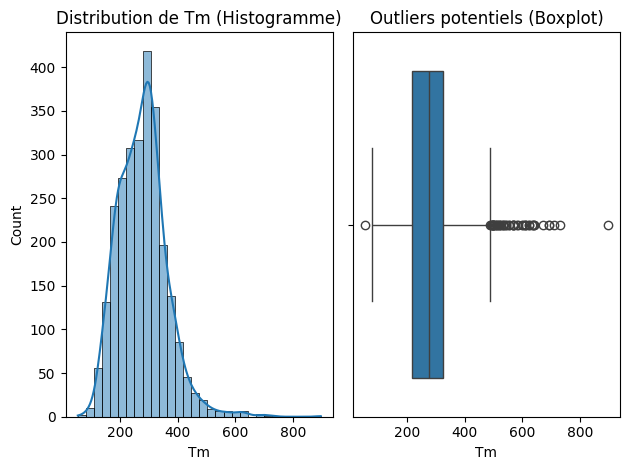

In [9]:
# 3.5.1 Visualisation de la distribution et valeurs aberrantes potentielles
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Histogramme (Distribution)
plt.subplot(1, 2, 1)
sns.histplot(df_final['Tm'], kde=True, bins=30)
plt.title('Distribution de Tm (Histogramme)')
plt.xlabel('Tm')

# 2. Boxplot (Détection visuelle des outliers)
plt.subplot(1, 2, 2)
sns.boxplot(x=df_final['Tm'])
plt.title('Outliers potentiels (Boxplot)')
plt.xlabel('Tm')

plt.tight_layout()
plt.show()


**Explication**

Le graphique **histogramme** illustre une distribution asymétrique qui s'étire vers la droite (il y a une "longue queue vers les hautes températures").

Le graphique **boxplot** illustre les valeurs aberrantes potentielles.

La visualisation de la distribution suggère l'écart interquartile comme méthode la plus robuste pour identifier les valeurs aberrantes.

---

In [10]:
# 3.5.2 Calcul des statistiques clés pour la méthode IQR
desc = df_final['Tm'].describe()
Q1 = desc['25%']
Q3 = desc['75%']
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df_final[(df_final['Tm'] < lower_bound) | (df_final['Tm'] > upper_bound)]
num_outliers = len(outliers)

print(f"Statistiques de Tm:\n{desc}\n")
print("IQR Limites de détection:")
print(f"Borne inférieure: {lower_bound:.2f}")
print(f"Borne supérieure: {upper_bound:.2f}")
if len(outliers) > 0:
    print(f"Nombre de outliers : {num_outliers}")
    print("\nAperçu de quelques outliers (Tm) :")
    outliers_sorted = outliers.sort_values(by="Tm", ascending=False)
    print(outliers_sorted[['id', 'SMILES', 'Tm']].head())
else:
    print("Aucun outlier détecté selon la règle IQR.")

# Calcul du coefficient d'asymétrie (Skewness)
skewness = df_final['Tm'].skew()
print(f"\nCoefficient d'asymétrie (Skewness) de Tm: {skewness:.4f}")
# Interprétation
if abs(skewness) < 0.5:
    print("→ La distribution est proche d'une asymétrie normale.")
elif abs(skewness) < 1:
    print("→ Distribution modérément asymétrique.")
else:
    print("→ Distribution fortement asymétrique (non normale).")

# Calcul du coefficient d'asymétrie (Kurtosis)
kurtosis = df_final['Tm'].kurt()
print(f"\nCoefficient d'asymétrie (Kurtosis) de Tm: {kurtosis:.4f}")
# Interprétation
if abs(kurtosis) < 1:
    print("→ Kurtosis proche d'une distribution normale.")
elif kurtosis > 1:
    print("→ Distribution leptokurtique (queues épaisses).")
else:
    print("→ Distribution platykurtique (aplatie).")

# Sauvegarde du DataFrame nettoyé
filename = "train_cleaned.csv"
df_final.to_csv(filename, index=False, encoding='utf-8')
print(f"\nLe DataFrame a été sauvegardé en tant que {filename}.")

Statistiques de Tm:
count    2660.000000
mean      278.345239
std        85.097463
min        53.540000
25%       217.150000
50%       277.500000
75%       325.225000
max       897.150000
Name: Tm, dtype: float64

IQR Limites de détection:
Borne inférieure: 55.04
Borne supérieure: 487.34
Nombre de outliers : 48

Aperçu de quelques outliers (Tm) :
        id                                             SMILES      Tm
1095  1593  CCCCCCCCCCCCCCCC(=O)OCC(COC(=O)CCCCCCCCCCCCCCC...  897.15
1405    24      CC(C)CCCC(C)C1CCC2C3CC=C4CC(O)CCC4(C)C3CCC12C  732.15
418   1219             c1cc2ccc3ccc4ccc5ccc6ccc1c1c2c3c4c5c61  710.45
131    886         CC(C)CCCC(C)CCCC(C)CCCCC(C)CCCC(C)CCCC(C)C  693.15
2526   979                        CCCCCCCCCCCCCCCCCCCCCC(=O)O  693.15

Coefficient d'asymétrie (Skewness) de Tm: 0.9045
→ Distribution modérément asymétrique.

Coefficient d'asymétrie (Kurtosis) de Tm: 2.7921
→ Distribution leptokurtique (queues épaisses).

Le DataFrame a été sauvegardé en tant que t

**Explication**

Les statistiques descriptives de Tm révèlent une `moyenne de 278.35 K` et une `médiane de 277.5 K` presque identique. Ce qui est rare et positif. Cela signifie que le "cœur" de la distribution est très équilibré. La majorité des molécules se comportent de manière `normale autour de 278 K`.

L'analyse des valeurs aberrantes (outliers) a révélé `48 molécules` dont la température de fusion (Tm) est `supérieure à 487.37 K` (la limite supérieure Q3 + 1.5 * IQR). Cependant, en chimie, une valeur aberrante de Tm correspond souvent à une molécule ayant une structure chimique exceptionnelle qui lui confère une température de fusion (Tm) très basse ou très élevée. De plus, la `valeur la plus grande étant 897.15 K (qui correspond également avec un SMILES plus complexe) est tout à fait chimiquement plausible`. Donc nous **ne supprimons pas les outliers** : souvent, ces derniers sont les points les plus intéressants du jeu de données, car ils définissent les limites du phénomène que nous essayons de modéliser.

Le coefficient d'asymétrie `(Skewness) de 0.9045` confirme l'asymétrie positive (s'étirant vers la droite) de la distribution.

Le coefficient d'asymétrie `(Kurtosis) de 2.7921` confirme que les *outliers* sont significatives et ne peuvent pas être supprimés.

---

# 4. Analyse des hypothèses.

**Définir l'unité de modélisation :**

La compétition mesure la performance de la modélisation avec l'erreur absolue moyenne (*MAE, Mean Absolute Error*). La *MAE* exprime l'erreur dans la même unité que la variable cible, soit en Kelvin (K). Donc, plus l'erreur absolue moyenne est petite, plus la modélisation est performante. Notre objectif est une *MAE* < 35 K.

Bien que la compétition demande que la MAE, pour notre projet, nous sommes aussi intéressés au coefficient de détermination (R2) et le temps d'exécution. Le coefficient de détermination sert de complément à la MAE : alors que la MAE mesure l'erreur moyenne en degrés, le R2 quantifie la puissance statistique globale du modèle (c'est-à-dire, il mesure la proportion de la variance du point de fusion (Tm) qui est expliquée par les descripteurs GroupX).

Avant d'analyser et développer les modèles d'apprentissage, nous allons vérifier les hypothèses suivantes :

**H0 (hypothèse nulle)** : Les descripteurs fournis, GroupX, n'ont pas de relation prédictive significative avec le point de fusion Tm. Autrement dit, aucun modèle entraîné sur ces variables ne peut prédire Tm mieux qu'un prédicteur naïf (prédiction de la moyenne ou de la médiane de Tm sur l'ensemble d'entraînement ou le hasard).

**Hₐ (hypothèse alternative)** : Les descripteurs fournis, GroupX, contiennent suffisamment d'information pour permettre à un modèle d'apprentissage automatique de prédire le point de fusion (Tm) avec une Erreur Absolue Moyenne (MAE, *Mean Average Error*) significativement inférieure à celle d'un prédicteur naïf.


## 4.1 Effectuer une régression linéaire multiple pour déterminer l'effet des descripteurs (GroupX) sur le point de fusion(Tm).

In [11]:
## 4.1 Régression linéaire multiple.
import statsmodels.api as sm
from scipy import stats

df_final = pd.read_csv('train_cleaned.csv')

print("--- TEST F : Régression Linéaire Multiple ---")
print(f"Nombre de lignes pour le test après nettoyage : {len(df_final)}")

# Définir les Variables X et y (Modélisation RLM)
# X : Tous les groupes descripteurs
feature_cols = group_cols
X = df_final[feature_cols]
y = df_final['Tm']

# Ajouter la constante pour le terme d'interception (beta_0)
# C'est une étape nécessaire dans statsmodels
X = sm.add_constant(X)

# Entraîner le modèle de Régression Linéaire par Moindres Carrés Ordinaires (MCO/OLS)
model = sm.OLS(y, X, hasconst=True)
results = model.fit()

# Affichage du Test F
p_value_f_test = results.f_pvalue
R_squared = results.rsquared

print("\n--- Conclusion du Test F ---")
print(f"R-carré du modèle : {R_squared:.4f}")
print(f"p-value du Test F (Probabilités (F-statistic)) : {p_value_f_test:.2e}")


--- TEST F : Régression Linéaire Multiple ---
Nombre de lignes pour le test après nettoyage : 2660

--- Conclusion du Test F ---
R-carré du modèle : 0.7033
p-value du Test F (Probabilités (F-statistic)) : 0.00e+00


**Explication**

Le coefficient de détermination **($R^2$)** indique que 70.33% de la variation totale de la variable dépendante (Tm) est expliquée par l'ensemble des variables indépendantes (les groupes) incluses dans notre modèle. C'est un bon pouvoir explicatif!

La probabilité associée au Test F **(p-value)** est de 0.00e+00, ce qui est inférieur à 0.05 (ou 0.01). Cela indique que notre modèle, dans son ensemble, est statistiquement très significatif et qu'au moins une des variables indépendantes contribue à l'explication de Tm.

---

## 4.2 Vérifier les suppositions nécessaires à la régression linéaire multiple.

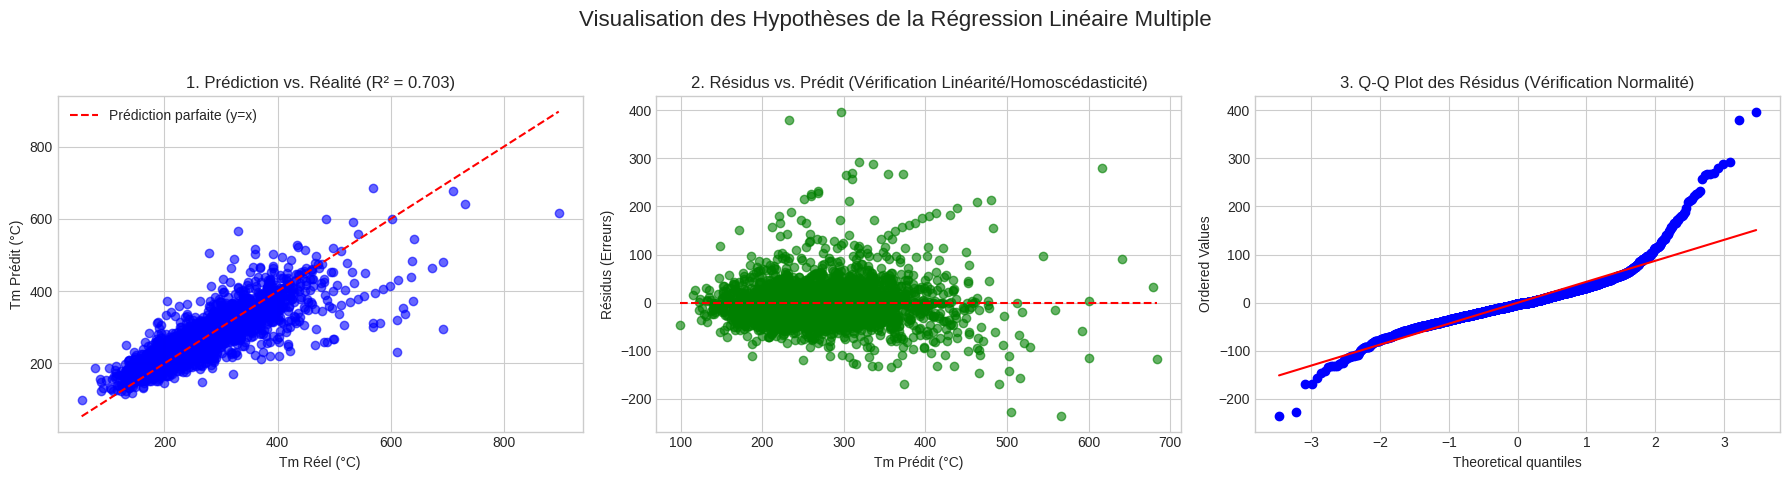

In [12]:
# 4.2 Vérifier les suppositions et générer les graphiques

# Valeurs nécessaires pour les graphiques
y_pred = results.predict(X)
residuals = results.resid

# Configuration globale des graphiques
plt.style.use('seaborn-v0_8-whitegrid')
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
fig.suptitle('Visualisation des Hypothèses de la Régression Linéaire Multiple', fontsize=16)

### 1. Nuage de Points de Prédiction vs. Réalité (Performance)
# ------------------------------------------------------------------
ax = axes[0]
ax.scatter(y, y_pred, alpha=0.6, color='blue')
# Ligne diagonale parfaite (y=x)
min_val = min(y.min(), y_pred.min())
max_val = max(y.max(), y_pred.max())
ax.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--', label='Prédiction parfaite (y=x)')

ax.set_title(f'1. Prédiction vs. Réalité (R² = {results.rsquared:.3f})')
ax.set_xlabel('Tm Réel (°C)')
ax.set_ylabel('Tm Prédit (°C)')
ax.legend()

### 2. Graphique des Résidus vs. Valeurs Prédites (Homoscédasticité)
# ------------------------------------------------------------------
ax = axes[1]
ax.scatter(y_pred, residuals, alpha=0.6, color='green')
# Ligne de référence y=0
ax.hlines(0, xmin=y_pred.min(), xmax=y_pred.max(), color='red', linestyle='--')

ax.set_title('2. Résidus vs. Prédit (Vérification Linéarité/Homoscédasticité)')
ax.set_xlabel('Tm Prédit (°C)')
ax.set_ylabel('Résidus (Erreurs)')

### 3. Q-Q Plot des Résidus (Normalité)
# ------------------------------------------------------------------
ax = axes[2]
# stats.probplot génère le Q-Q plot
stats.probplot(residuals, dist="norm", plot=ax)

ax.set_title('3. Q-Q Plot des Résidus (Vérification Normalité)')
ax.get_lines()[0].set_color('blue') # Changer la couleur des points
ax.get_lines()[1].set_color('red')  # Changer la couleur de la ligne théorique

plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Ajustement pour le titre général
plt.show()


**Explication**

Analyse visuelle :

1. Prédiction vs. Réalité : Le R² de 0.703 est confirmé par la forte concentration des points autour de la ligne y=x.

2. Résidus vs. Prédit : L'absence de forme (courbe, entonnoir) indique que les hypothèses de linéarité et d'homoscédasticité sont raisonnablement respectées.

3. Q-Q Plot : La plupart des points suivent bien la ligne diagonale, confirmant que la distribution des erreurs s'approche d'une loi normale, ce qui valide l'utilisation du Test F.

En conclusion, les suppositions sont justifiées. Le p-value est plus petit que 0.05, $H_{0}$ est donc rejeté, ce qui veut dire que l'ensemble les descripteurs GroupX a une relation linéaire statistiquement significative avec le point de fusion Tm. Nous pouvons procéder à l'analyse!

---


# 5. Modélisation.

In [13]:
# Installer scikit-learn
!pip install scikit-learn

## 5.1 Choix de techniques d'apprentissage machine et évaluation des performances.

Dans cette section, nous comparons les différentes méthodes d'apprentissage machine automatique pour savoir laquelle offira la meilleure *MAE (Mean Average Error)*.

Le test se base uniquement sur les descripteurs structurels de base (GroupX) et les paramètres utilisées pour chaque modèle sont standard, c'est-à-dire, le minimum requis.

Les modèles sont :

    Modèles de base :
        *   LinearRegression
        *   Ridge
        *   k-NN
    Modèles intermédiaires :
        *   SVR (Support Vector Regression)
    Modèles avancées :
        *   Random Forest
        *   Gradient Boosting
        *   XGBoost
        *   LightGBM




/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/tmp/ipython-input-1658425434.py:86: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="R2", y="Modèle", data=df_results, palette="viridis")


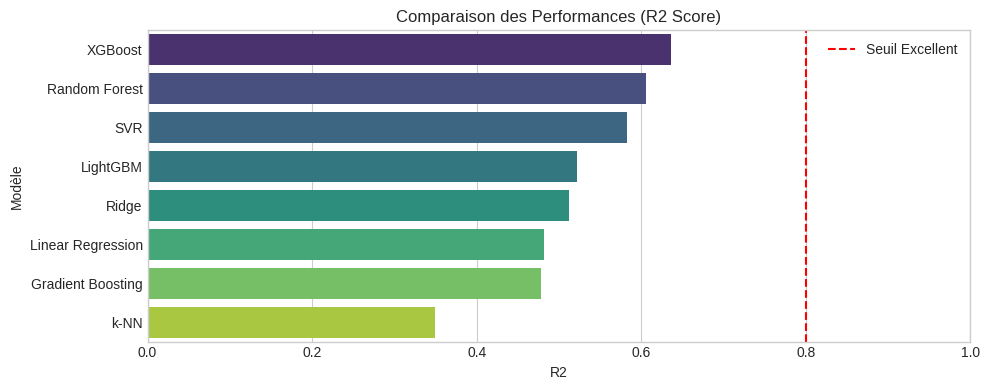


--- Classement final par ordre de MAE ---
              Modèle        R2        MAE  Temps (s)
6            XGBoost  0.636506  34.269440   0.336094
4      Random Forest  0.605933  35.055345   4.380241
3                SVR  0.582183  36.452886   2.155667
7           LightGBM  0.521970  39.767705   0.140735
1              Ridge  0.512474  42.746883   0.080406
0  Linear Regression  0.482389  43.356222   0.196664
5  Gradient Boosting  0.478023  44.113596   0.987072
2               k-NN  0.349136  47.369547   0.008084


In [ ]:
## 5.1 Choix de méthodes
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import RobustScaler, StandardScaler, QuantileTransformer
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import xgboost as xgb
from xgboost import XGBRegressor
import lightgbm as lgb # Import LightGBM
from lightgbm import LGBMRegressor # Import LGBMRegressor
import numpy as np
import pandas as pd
import time

df_final = pd.read_csv('train_cleaned.csv')

# Définition de X et y à partir du DataFrame FINAL
# On combine les GroupX originaux avec nos nouvelles colonnes calculées
feature_cols = [col for col in df_final.columns if col.startswith('Group')] # inclut Group1...Group424
X = df_final[feature_cols]
y = df_final['Tm']

# Discrétisation de Tm pour stratification
df_final['Tm_bins'] = pd.qcut(df_final['Tm'], q=10, labels=False, duplicates='drop')

# Train/validation split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=df_final['Tm_bins']
)

# --- 3. Prétraitement (Important !) ---
# SVR, k-NN, Ridge et Régression Linéaire nécessitent une mise à l'échelle (Scaling).
# Les modèles d'arbres (RF, XGB, LGBM) n'en ont pas besoin, mais cela ne leur nuit pas.
scaler = QuantileTransformer()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# --- 4. Configuration des Modèles à tester ---
models_to_test = [
    # Modèles de Base
    ("Linear Regression", LinearRegression()),
    ("Ridge", Ridge(alpha=1.0)),
    ("k-NN", KNeighborsRegressor(n_neighbors=5)),

    # Modèles Intermédiaires
    ("SVR", SVR(C=100, gamma='scale', kernel='rbf')), # RBF est le noyau standard pour le non-linéaire

    # Modèles Avancés (Ensembles)
    ("Random Forest", RandomForestRegressor(n_estimators=100, random_state=42)),
    ("Gradient Boosting", GradientBoostingRegressor(n_estimators=100, random_state=42)),
    ("XGBoost", XGBRegressor(n_estimators=100, random_state=42, n_jobs=-1)),
    ("LightGBM", LGBMRegressor(n_estimators=100, random_state=42, n_jobs=-1, verbose=-1))
]

# --- 5. Boucle d'entraînement et d'évaluation ---
results = []

for name, model in models_to_test:
    # Mesure du temps d'entraînement
    start_time = time.time()
    model.fit(X_train_scaled, y_train)
    end_time = time.time()
    training_time = end_time - start_time

    # Prédiction
    y_pred = model.predict(X_test_scaled)

    # Calcul des métriques
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)

    # Stockage
    results.append({
        "Modèle": name,
        "R2": r2,
        "MAE": mae,
        "Temps (s)": training_time
    })

# --- 6. Visualisation des Résultats ---
df_results = pd.DataFrame(results).sort_values(by="R2", ascending=False)

plt.figure(figsize=(10, 4))
sns.barplot(x="R2", y="Modèle", data=df_results, palette="viridis")
plt.title("Comparaison des Performances (R2 Score)")
plt.xlim(0, 1.0)  # R2 est max à 1
plt.axvline(x=0.8, color='r', linestyle='--', label='Seuil Excellent')
plt.legend()
plt.tight_layout()
plt.show()

print("\n--- Classement final par ordre de MAE ---")
print(df_results)


**Explication**

L'évaluation des perfermances révèle que **XGBoost** est le plus performant avec les descripteurs structurels de base, atteignant un score *MAE* de 34.2694 et un score *R<sup>2</sup>* de 0.6365.



---



## 5.2 Ingénerie de features avec RDKit.

L'ajout ses ***features*** vise à fournir au modèle une compréhension beaucoup plus riche et précise de la structure moléculaire que les simples descripteurs initiaux (GroupX) :

1.  Capturer la complexité chimique globale

    Les colonnes originales (Group 1 à Group 424) ne comptent que le nombre d'occurrences de fragments spécifiques. En ajoutant les descripteurs RDKit, on introduit des propriétés physico-chimiques globales essentielles pour le point de fusion, telles que :

    *   La masse moléculaire et la distribution des électrons.
    *   La polarité (TPSA) et l'hydrophobie (LogP).
    *   La flexibilité de la molécule (nombre de liaisons rotatives).

2.  Encoder la connectivité avec les Morgan Fingerprints

    Alors que les groupes initiaux sont des compteurs isolés, les Morgan Fingerprints (ou circular fingerprints) encodent l'environnement local de chaque atome sur un rayon précis :

    *   Cela permet de capturer comment les fragments sont connectés entre eux, ce qui influence directement la stabilité du réseau cristallin et donc la température de fusion.
    *   Ils transforment la structure en un vecteur binaire (de taille 1024 dans ce code) qui représente l'empreinte digitale unique de la molécule.
  


In [ ]:
## 5.2 Ingénerie de features avec RDKit.
### Ajouter de features.
import time
import pandas as pd
import numpy as np
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import Descriptors
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import QuantileTransformer
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from xgboost import XGBRegressor
from rdkit.Chem import Lipinski, Crippen, MolSurf, Descriptors3D
from rdkit.Chem import rdMolDescriptors
from rdkit import Chem
import numpy as np

# --- Désactivation des warnings ---
import warnings
from rdkit import RDLogger
lg = RDLogger.logger()
lg.setLevel(RDLogger.CRITICAL)

# Ignorer spécifiquement les avertissements de dépréciation pour MorganGenerator (Python warnings module)
warnings.filterwarnings("ignore", message="DEPRECATION WARNING: please use MorganGenerator")
# Ignorer les avertissements de dépréciation généraux (Python warnings module)
warnings.filterwarnings("ignore", category=DeprecationWarning)

# Chargement des données
df_final = pd.read_csv('train_cleaned.csv')

# Constantes et paramètres
FINGERPRINT_SIZE = 1024
RANDOM_STATE = 42

# --- Fonctions utilitaires ---
def calculate_rdkit_features_dict(smiles):
    """Calcule tous les descripteurs RDKit pour un seul SMILES."""
    mol = Chem.MolFromSmiles(smiles)
    if mol is None:
        return {name: np.nan for name, function in Descriptors.descList}
    try:
        return Descriptors.CalcMolDescriptors(mol)
    except Exception:
        return {name: np.nan for name, function in Descriptors.descList}

def calculate_morgan_fingerprint(smiles, size=FINGERPRINT_SIZE, radius=2):
    """Calcule le Morgan Fingerprint pour un seul SMILES."""
    mol = Chem.MolFromSmiles(smiles)
    if mol is None:
        return [0] * size
    try:
        # Reverted to using AllChem.GetMorganFingerprintAsBitVect for compatibility
        fingerprint = AllChem.GetMorganFingerprintAsBitVect(mol, radius, nBits=size)
        return list(fingerprint) # Convert bit vector to list of ints
    except Exception:
        return [0] * size

print("Calcul et concaténation des nouvelles caractéristiques...")

# Calcul et Concaténation des Descripteurs RDKIT
rdkit_features = df_final['SMILES'].apply(calculate_rdkit_features_dict).apply(pd.Series)

# Calcul et Concaténation des Morgan FingerPrints
morgan_features_list = df_final['SMILES'].apply(calculate_morgan_fingerprint, size=FINGERPRINT_SIZE).tolist()
morgan_features = pd.DataFrame(morgan_features_list, index=df_final.index)
morgan_features.columns = [f'MorganFP_{i}' for i in range(FINGERPRINT_SIZE)]


Calcul et concaténation des nouvelles caractéristiques...


In [ ]:
## 5.2 Ingénerie de features avec RDKit.
### Préparation des données train/test.

# Définition de X et y
feature_cols = [col for col in df_final.columns if col.startswith('Group')] # Inclut Group1...Group424
X_group = df_final[feature_cols]

# Concaténation finale de toutes les caractéristiques
X = pd.concat([X_group, rdkit_features, morgan_features], axis=1)
y = df_final['Tm']

# Nettoyage des données (Imputation des NaN et suppression des colonnes constantes)
X = X.fillna(X.mean())
X = X.loc[:, X.nunique() > 1]
print(f"-> Taille finale de X (incluant les nouvelles features) : {X.shape}")

# Discrétisation de Tm pour stratification
df_final['Tm_bins'] = pd.qcut(df_final['Tm'], q=10, labels=False, duplicates='drop')

# Train/validation split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=RANDOM_STATE, stratify=df_final['Tm_bins']
)

print(f"\n✅ Split des données:")
print(f"   - X_train shape: {X_train.shape}")
print(f"   - X_test shape: {X_test.shape}")

# Mise à l'échelle des données
scaler = QuantileTransformer(output_distribution='normal', random_state=RANDOM_STATE)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("✅ Préparation des données terminée.")

-> Taille finale de X (incluant les nouvelles features) : (2660, 1561)

✅ Split des données:
   - X_train shape: (2128, 1561)
   - X_test shape: (532, 1561)
✅ Préparation des données terminée.


## 5.3 Entraînement.



In [ ]:
## 5.3 Choix de paramètres.

# ==============================================================================
# 3. ENTRAÎNEMENT ET TEST XGBOOST AVEC PARAMÈTRES FIXES
# ==============================================================================

# Utilisation d'un jeu de paramètres performants pour un test rapide
test_params = {
    'n_estimators': 500,
    'max_depth': 6,
    'learning_rate': 0.05,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'random_state': RANDOM_STATE,
    'n_jobs': -1
}

print("\n--- Entraînement et Test du Modèle XGBoost avec les Nouvelles Features ---")
print(f"Paramètres utilisés: {test_params}")

# Initialisation du modèle
final_xgb_model = XGBRegressor(**test_params)

# Entraînement sur le jeu d'entraînement
start_time = time.time()
final_xgb_model.fit(X_train_scaled, y_train)
training_time = time.time() - start_time

# Prédictions sur le jeu de test
y_pred_test = final_xgb_model.predict(X_test_scaled)

# Calcul des métriques finales
r2_final = r2_score(y_test, y_pred_test)
mae_final = mean_absolute_error(y_test, y_pred_test)
mse_final = mean_squared_error(y_test, y_pred_test) # Calculate MSE first
rmse_final = np.sqrt(mse_final) # Then calculate RMSE

# ==============================================================================
# 4. AFFICHAGE DES RÉSULTATS
# ==============================================================================

print("-" * 65)
print(f"{'Temps d\'Entraînement (s)':<30} | {training_time:.2f}")
print("-" * 65)
print("📈 Métriques sur le Jeu de Test (X_test_scaled) :")
print(f"R-squared (R²)                 | {r2_final:.4f}")
print(f"Erreur Absolue Moyenne (MAE)   | {mae_final:.4f}")
print(f"Racine de l'Erreur Quadratique (RMSE) | {rmse_final:.4f}")
print("-" * 65)
print("✅ Test avec les features chimiques terminé.")


--- Entraînement et Test du Modèle XGBoost avec les Nouvelles Features ---
Paramètres utilisés: {'n_estimators': 500, 'max_depth': 6, 'learning_rate': 0.05, 'subsample': 0.8, 'colsample_bytree': 0.8, 'random_state': 42, 'n_jobs': -1}
-----------------------------------------------------------------
Temps d'Entraînement (s)       | 12.12
-----------------------------------------------------------------
📈 Métriques sur le Jeu de Test (X_test_scaled) :
R-squared (R²)                 | 0.7769
Erreur Absolue Moyenne (MAE)   | 25.8495
Racine de l'Erreur Quadratique (RMSE) | 37.9604
-----------------------------------------------------------------
✅ Test avec les features chimiques terminé.


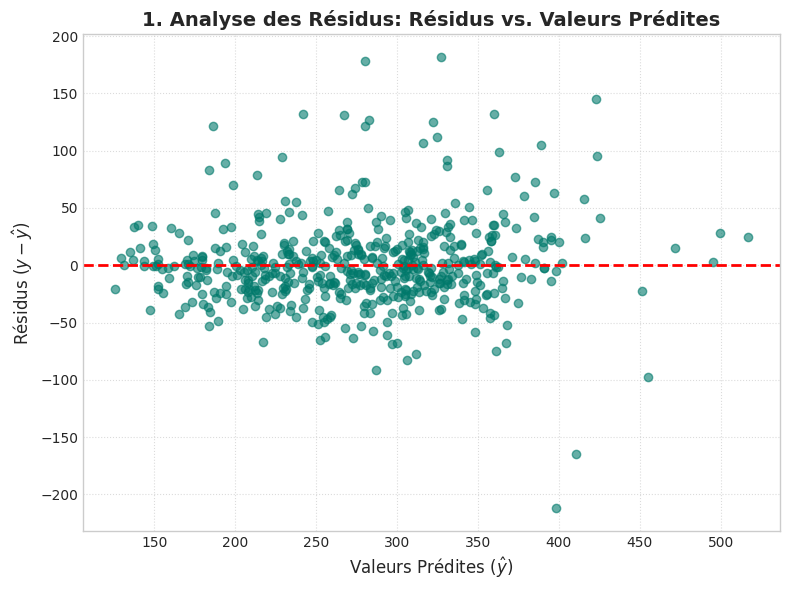

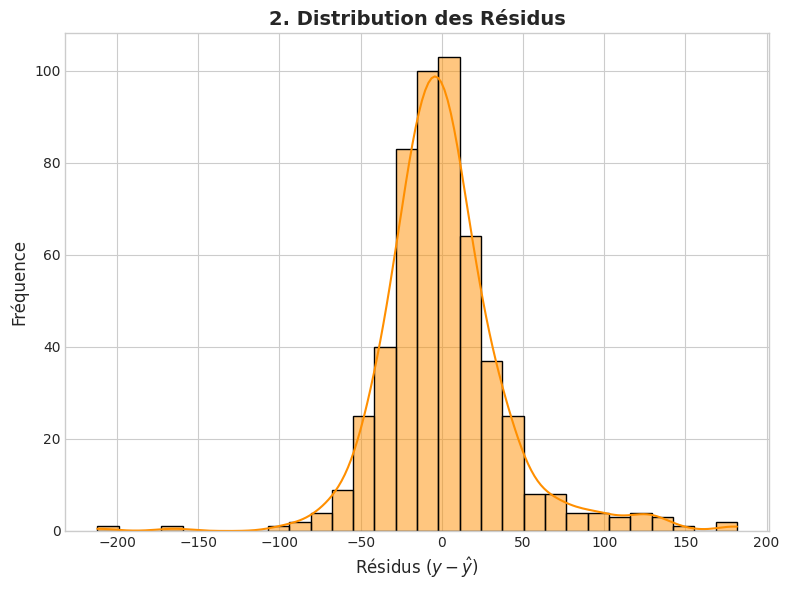

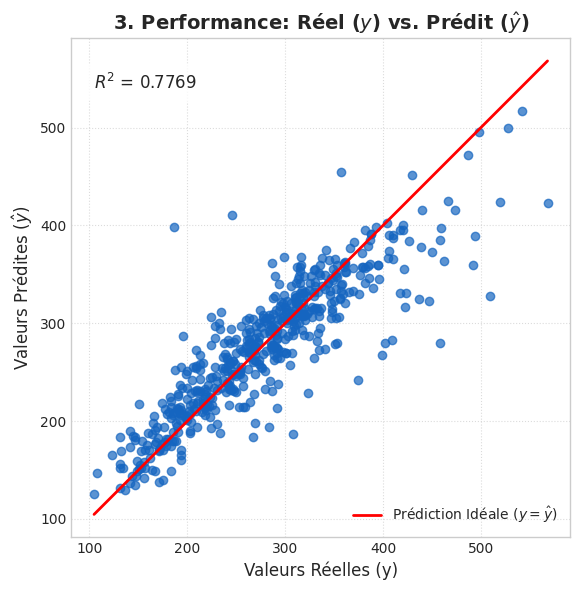

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score

# 1. Calcul des Résidus
# Les résidus sont la différence entre les valeurs réelles et les prédictions.
residuals = y_test - y_pred_test
r2 = r2_score(y_test, y_pred_test)

# Configuration de Matplotlib et Seaborn
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (15, 5) # Taille des figures pour une meilleure visualisation

# ==============================================================================
# GRAPHIQUE 1 : RÉSIDUS vs. PRÉDICTIONS (Diagnostic Principal des Biais)
# ==============================================================================
plt.figure(figsize=(8, 6))
plt.scatter(y_pred_test, residuals, color='#00796B', alpha=0.6) # Utilise une couleur Thème
plt.axhline(y=0, color='red', linestyle='--', linewidth=2)
plt.title('1. Analyse des Résidus: Résidus vs. Valeurs Prédites', fontsize=14, fontweight='bold')
plt.xlabel('Valeurs Prédites ($\\hat{y}$)', fontsize=12)
plt.ylabel('Résidus ($y - \\hat{y}$)', fontsize=12)
plt.grid(True, linestyle=':', alpha=0.7)
plt.tight_layout()
plt.show()

# Interprétation :
# - Si les points sont aléatoirement dispersés autour de la ligne rouge (y=0), c'est bon.
# - Si un motif apparaît (forme d'entonnoir, courbe), il y a un biais.

# ==============================================================================
# GRAPHIQUE 2 : HISTOGRAMME DE LA DISTRIBUTION DES RÉSIDUS (Normalité)
# ==============================================================================
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True, bins=30, color='#FF8F00', edgecolor='black')
plt.title('2. Distribution des Résidus', fontsize=14, fontweight='bold')
plt.xlabel('Résidus ($y - \\hat{y}$)', fontsize=12)
plt.ylabel('Fréquence', fontsize=12)
plt.tight_layout()
plt.show()

# Interprétation :
# - Si la distribution est centrée autour de zéro et se rapproche d'une cloche (Gaussienne),
#   c'est un bon signe d'erreurs aléatoires.
# - Si elle est très asymétrique ou multimodale, cela indique un problème.

# ==============================================================================
# GRAPHIQUE 3 : VALEURS RÉELLES vs. PRÉDICTIONS (Visualisation de la Performance)
# ==============================================================================
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_test, color='#1565C0', alpha=0.7)
min_val = min(y_test.min(), y_pred_test.min())
max_val = max(y_test.max(), y_pred_test.max())

# Ligne idéale y = x (prédiction parfaite)
plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='-', linewidth=2, label='Prédiction Idéale ($y=\\hat{y}$)')

# Affichage du R2
plt.text(min_val, max_val * 0.95, f'$R^2$ = {r2:.4f}',
         fontsize=12,
         bbox=dict(facecolor='white', alpha=0.8, boxstyle='round,pad=0.5'))

plt.title('3. Performance: Réel ($y$) vs. Prédit ($\\hat{y}$)', fontsize=14, fontweight='bold')
plt.xlabel('Valeurs Réelles (y)', fontsize=12)
plt.ylabel('Valeurs Prédites ($\\hat{y}$)', fontsize=12)
plt.legend()
plt.grid(True, linestyle=':', alpha=0.7)
plt.gca().set_aspect('equal', adjustable='box') # Force les axes à avoir la même échelle
plt.tight_layout()
plt.show()

# Interprétation :
# - Plus les points sont proches de la ligne rouge diagonale, meilleure est la prédiction.
# - Une dispersion loin de cette ligne indique un faible pouvoir prédictif.

In [ ]:
# ================== CREATE SUBMISSION ==================

# 1. Load data and clean column names (e.g., 'Group 1' -> 'Group1')
df_test = pd.read_csv('/content/test.csv', sep=',')
df_test.columns = df_test.columns.str.replace(' ', '')

# 2. Canonicalize SMILES and remove failures
df_test['SMILES_Canonical'] = df_test['SMILES'].apply(convert_canonical_smiles)
df_test.dropna(subset=['SMILES_Canonical'], inplace=True)

# 3. Generate all features in one concatenation
# This combines Group columns, RDKit descriptors, and Morgan Fingerprints
X_test = pd.concat([
    df_test.filter(like='Group'),
    df_test['SMILES_Canonical'].apply(calculate_rdkit_features_dict).apply(pd.Series),
    pd.DataFrame(
        df_test['SMILES_Canonical'].apply(calculate_morgan_fingerprint, size=FINGERPRINT_SIZE).tolist(),
        index=df_test.index
    ).add_prefix('MorganFP_')
], axis=1).fillna(0)

# 4. Align columns with training data (adds missing cols as 0 and ensures correct order)
X_test = X_test.reindex(columns=X.columns, fill_value=0)

# 5. Scale, Predict, and Save
X_test_scaled = scaler.transform(X_test)

submission = pd.DataFrame({
    'id': df_test['id'],
    'Tm': final_xgb_model.predict(X_test_scaled)
})

submission.to_csv('submission.csv', index=False)

print(f"\n{'='*60}")
print("SUBMISSION SUMMARY")
print(f"{'='*60}")
print(f"✅ Submission saved to: submission.csv")
print(f"✅ Number of predictions: {len(submission)}")
print(f"✅ Predicted Tm range: [{submission.Tm.min():.2f}, {submission.Tm.max():.2f}]")
print(f"✅ Mean prediction: {submission.Tm.mean():.2f}")
print(f"✅ Std prediction: {submission.Tm.std():.2f}")

# Display first few predictions
print("\nFirst 10 predictions:")
print(submission.head(10))



SUBMISSION SUMMARY
✅ Submission saved to: submission.csv
✅ Number of predictions: 666
✅ Predicted Tm range: [113.77, 616.02]
✅ Mean prediction: 275.71
✅ Std prediction: 73.07

First 10 predictions:
     id          Tm
0  1022  342.399384
1  1146  338.399811
2    79  192.175888
3  2279  202.091995
4  1342  244.305740
5  2082  340.709534
6    29  282.333923
7   515  318.774139
8  2309  282.435120
9  1177  255.352127


/tmp/ipython-input-4083229855.py:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(y, label='Valeurs Réelles (Train)', shade=True, color="blue", bw_adjust=0.5)
/tmp/ipython-input-4083229855.py:10: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(submission['Tm'], label='Prédictions (Test.csv)', shade=True, color="red", bw_adjust=0.5)


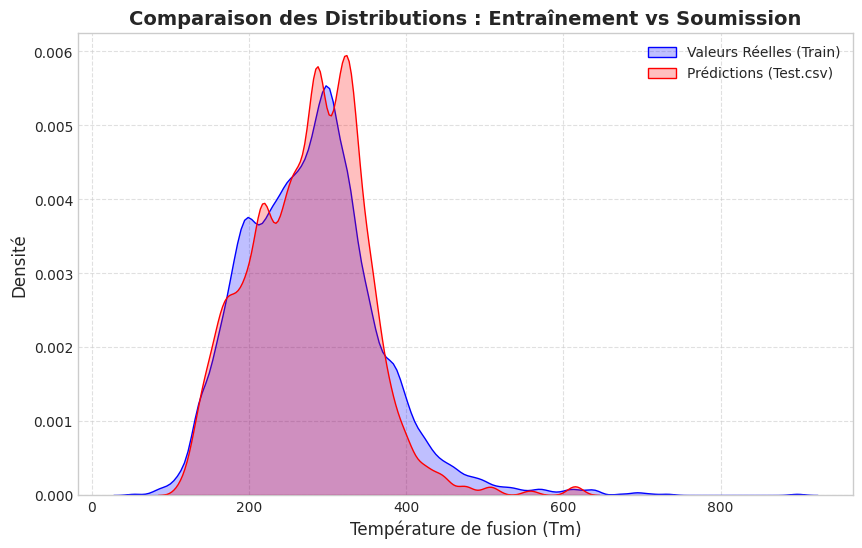

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))

# 1. Distribution des valeurs réelles (Train/Validation)
sns.kdeplot(y, label='Valeurs Réelles (Train)', shade=True, color="blue", bw_adjust=0.5)

# 2. Distribution de vos prédictions (Test.csv)
sns.kdeplot(submission['Tm'], label='Prédictions (Test.csv)', shade=True, color="red", bw_adjust=0.5)

plt.title('Comparaison des Distributions : Entraînement vs Soumission', fontsize=14, fontweight='bold')
plt.xlabel('Température de fusion (Tm)', fontsize=12)
plt.ylabel('Densité', fontsize=12)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.savefig('distribution_train_test.png')
plt.show()


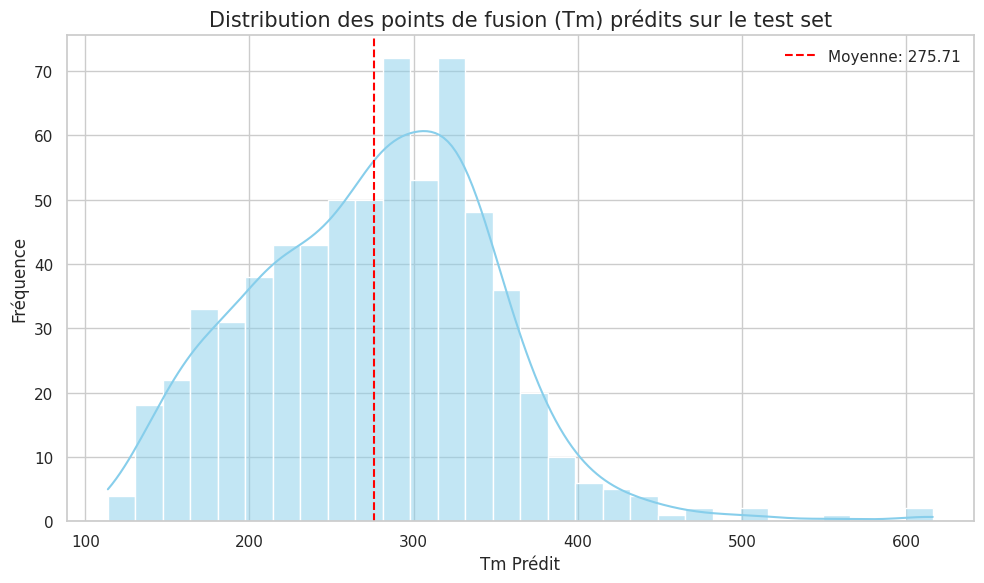

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

final_preds = final_xgb_model.predict(X_test_scaled)

# Configuration du style des graphiques
sns.set_theme(style="whitegrid")

# 1. Distribution des prédictions Tm sur le jeu de test
plt.figure(figsize=(10, 6))
sns.histplot(final_preds, kde=True, color='skyblue', bins=30)
plt.axvline(final_preds.mean(), color='red', linestyle='--', label=f'Moyenne: {final_preds.mean():.2f}')
plt.title('Distribution des points de fusion (Tm) prédits sur le test set', fontsize=15)
plt.xlabel('Tm Prédit', fontsize=12)
plt.ylabel('Fréquence', fontsize=12)
plt.legend()
plt.tight_layout()
plt.savefig('distribution_predictions.png')
plt.show()




---



---



In [ ]:
# 1. Install necessary libraries
!pip install rdkit streamlit xgboost pandas numpy scikit-learn -q
!npm install -g localtunnel -q

⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧
changed 22 packages in 2s
⠧
⠧3 packages are looking for funding
⠧  run `npm fund` for details
⠧

In [ ]:
%%writefile app.py
import streamlit as st
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from rdkit import Chem
from rdkit.Chem import Draw

# Page Config
st.set_page_config(page_title="Chemical Tm Explorer", layout="wide")

# CSS to ensure sidebar visibility
st.markdown("""
    <style>
    section[data-testid="stSidebar"] {
        width: 300px !important;
    }
    </style>
    """, unsafe_allow_html=True)

# Path to Colab files
test_path = "/content/test.csv"
sub_path = "/content/submission.csv"

@st.cache_data
def load_data():
    if os.path.exists(test_path) and os.path.exists(sub_path):
        df_test = pd.read_csv(test_path)
        df_sub = pd.read_csv(sub_path)
        # Merge ID, SMILES and Predictions
        res = pd.merge(df_test[['id', 'SMILES']], df_sub[['id', 'Tm']], on='id')
        res['id'] = res['id'].astype(int)
        return res
    return None

results = load_data()

if results is not None:
    # Sidebar: Dropdown Only
    st.sidebar.header("Navigation")
    all_ids = results['id'].tolist()

    selected_id = st.sidebar.selectbox(
        "Choose a Molecule ID:",
        options=all_ids,
        index=0
    )

    # Main Content
    st.title("🧪 Molecular Prediction Explorer")
    row = results[results['id'] == selected_id].iloc[0]

    col1, col2 = st.columns([1, 1.2])
    with col1:
        st.subheader(f"Molecule ID: {selected_id}")
        st.metric("Predicted Tm", f"{row['Tm']:.2f} °C")
        st.info(f"**SMILES:** `{row['SMILES']}`")

        avg_tm = results['Tm'].mean()
        st.write(f"Difference from average: **{row['Tm'] - avg_tm:+.1f}°C**")

    with col2:
        # Chemical visualization using RDKit
        mol = Chem.MolFromSmiles(row['SMILES'])
        if mol:
            img = Draw.MolToImage(mol, size=(500, 500))
            st.image(img, use_container_width=True)

    # Global Statistics Section
    st.divider()
    st.subheader("📊 Global Prediction Statistics")
    c1, c2, c3 = st.columns(3)
    c1.metric("Total Count", len(results))
    c2.metric("Mean Tm", f"{avg_tm:.2f} °C")
    c3.metric("Standard Dev", f"{results['Tm'].std():.2f} °C")

    # Plot distribution
    fig, ax = plt.subplots(figsize=(10, 4))
    sns.histplot(results['Tm'], kde=True, color="skyblue", ax=ax)
    ax.axvline(row['Tm'], color='red', linestyle='--', label=f'ID {selected_id}')
    ax.set_title("Distribution of Predictions in test.csv")
    ax.legend()
    st.pyplot(fig)

else:
    st.error("Error: Could not find files at /content/test.csv or /content/submission.csv")


Overwriting app.py


In [ ]:
# 2. Get your unique Tunnel Password (the Colab Instance IP)
import urllib
print("STEP 1: Copy this IP address (Password):",
      urllib.request.urlopen('https://ipv4.icanhazip.com').read().decode('utf8').strip())

# 3. Launch Streamlit in the background
import subprocess
import time
# We use 'nohup' or subprocess to keep it running in the background
subprocess.Popen(["streamlit", "run", "app.py", "--server.port", "8501"])

# 4. Create the public link
print("STEP 2: Click the link below and paste the IP address from STEP 1")
!npx localtunnel --port 8501


STEP 1: Copy this IP address (Password): 34.68.157.221
STEP 2: Click the link below and paste the IP address from STEP 1
⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴your url is: https://crazy-friends-wave.loca.lt
^C
